In [1]:
import math

from qiskit_extension.quantum_circuit2 import QuantumCircuit2 as qc2
from qiskit_extension.state_vector2 import StateVector2 as sv2

## Initialize two EPR pairs

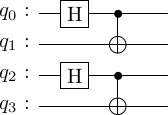

In [2]:
# Create a 4bits quantum circuit
circ_init = qc2(4)

# Make ground state qubit(0,1) and qubit(2,3) entangled into two EPR pairs
circ_init.h([0,2])
circ_init.cx([0,2],[1,3])

# Display the circuit
circ_init.show_circ()

In [3]:
# Put the ground state into the circuit we build in previous step, and get two EPR pairs
state_EPR = sv2(circ_init)

# Show state
state_EPR.show_state()

<IPython.core.display.Latex object>

## Perform entangled swap ; Perform Bell measurement on qubits(2,3)

In [7]:
circ_Bell_measure = qc2(4)
circ_Bell_measure.cx(1,2)
circ_Bell_measure.h(1)

# Bell measurement on qubits(1,2), and store the four possible states as a list after measurement
# list[0b00]=state after measurement result is 00, 
# list[0b01]=state after measurement result is 01, 
# ...
list_state_EPR_after_Bell_measure = state_EPR.evolve(circ_Bell_measure).measure([1,2])

# Show the four possible states after the Bell measurement
# Display format: (|00> indicates the measured state, followed by a colon indicating [the remaining state after measurement result is 00])
# |00>: 1/2|0> + 1/2|1> ...
state_EPR.evolve(circ_Bell_measure).show_measure([1,2])

<IPython.core.display.Latex object>

Take measurement result is 01 for example: perform correction on qubits(0,3)

In [9]:
# Get the state after measuring, and the measurement result is 01
state_before_correction = list_state_EPR_after_Bell_measure[0b01]

# Show the state before correction
state_before_correction.show_state(hide=[1,2])

<IPython.core.display.Latex object>

In [12]:
# Correction circuit (measurement result is 01, so perform Pauli-X on qubit 3)
circ_correction = qc2(4)
circ_correction.x(3)

# Put state_before_correction into the correction circuit, get the state after correction
state_after_correction = state_before_correction.evolve(circ_correction)

# Show corrected state, make sure that entangled swap successful
state_after_correction.show_state(hide=[1,2])

<IPython.core.display.Latex object>